In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary


| Variable | Definition    | Key |
|------    |------         |     |
|survival  |	Survival   |	0 = No, 1 = Yes|
|pclass	   |Ticket class   |1 = 1st, 2 = 2nd, 3 = 3rd|
|sex       |Sex|           |	
|Age	   |Age in years   ||
|sibsp	   |# of siblings / spouses aboard the Titanic||
|parch	   |# of parents / children aboard the Titanic||
|ticket	   |Ticket number	||
|fare	   |Passenger fare	||
|cabin	   |Cabin number	||
|embarked  |Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Visualize data

c:\users\ajdin\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


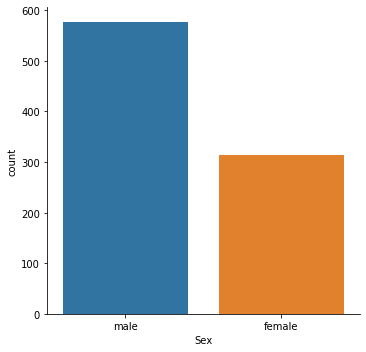

In [6]:
sns.factorplot("Sex", data = train, kind = "count")

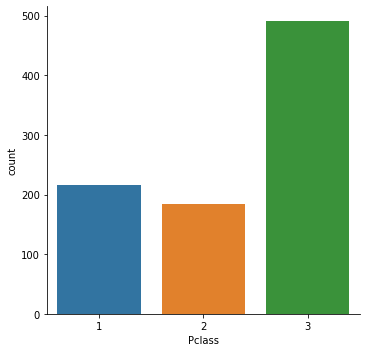

In [7]:
sns.factorplot("Pclass", data = train, kind = "count")

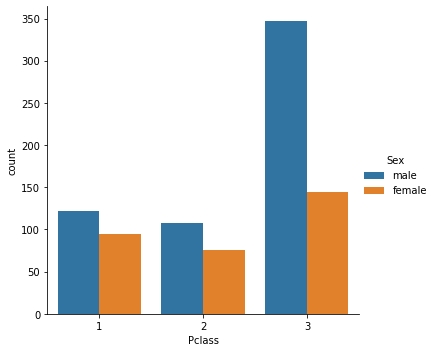

In [8]:
sns.factorplot("Pclass", data = train, hue = "Sex", kind = "count")

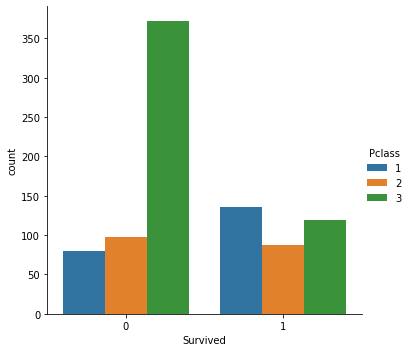

In [9]:
sns.factorplot("Survived", data = train, hue = "Pclass", kind = "count")

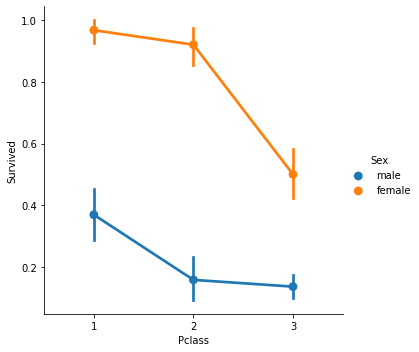

In [10]:
sns.factorplot('Pclass','Survived',data=train,hue='Sex')


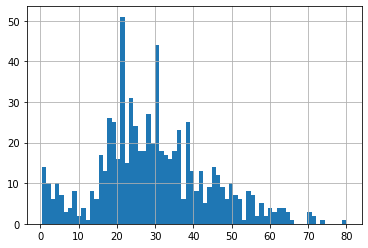

In [11]:
train["Age"].hist(bins = 70)

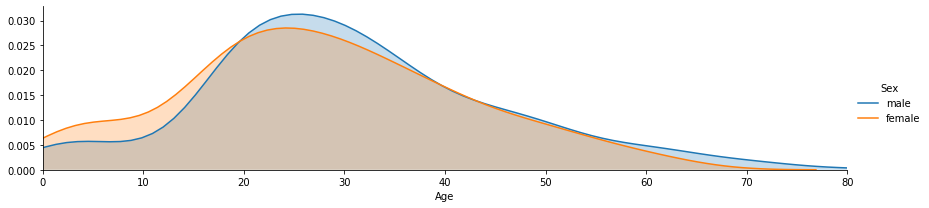

In [12]:
fig = sns.FacetGrid(train, hue = "Sex", aspect = 4)
fig.map(sns.kdeplot, "Age", shade = True)
oldest = train["Age"].max()
fig.set(xlim = (0, oldest))
fig.add_legend()

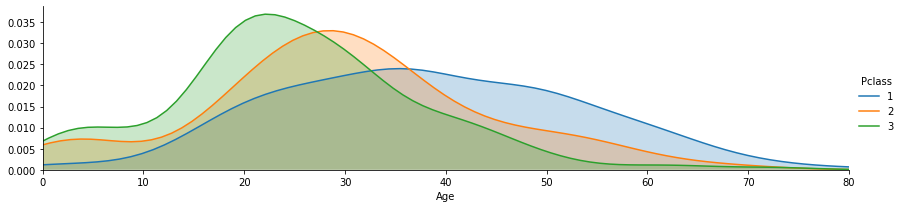

In [13]:
fig = sns.FacetGrid(train, hue = "Pclass", aspect = 4)
fig.map(sns.kdeplot, "Age", shade = True)
oldest = train.Age.max()
fig.set(xlim = (0, oldest))
fig.add_legend()

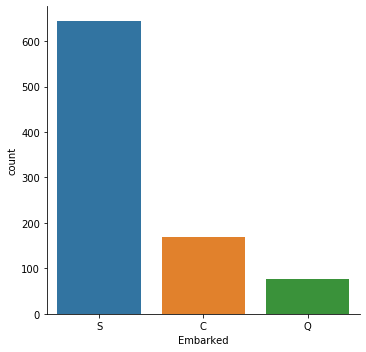

In [14]:
sns.factorplot("Embarked", data = train, kind = "count")

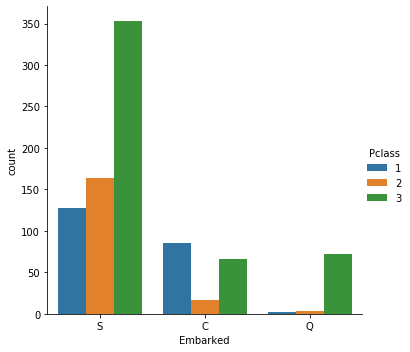

In [15]:
sns.factorplot("Embarked", data = train, hue = "Pclass", kind = "count")

In [16]:
pd.crosstab([train["Sex"], train["Survived"]], train["Pclass"], 
            margins = True).style.background_gradient(cmap = "summer_r")

### Feature Engineering and Preprocessing data

In [17]:
train_objs_num = len(train)
y = train["Survived"]
train.drop(["Survived"], axis = 1, inplace = True)
dataset = pd.concat([train, test], axis = 0)

In [18]:
dataset["Family Size"] = dataset["SibSp"] + dataset["Parch"]

c:\users\ajdin\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


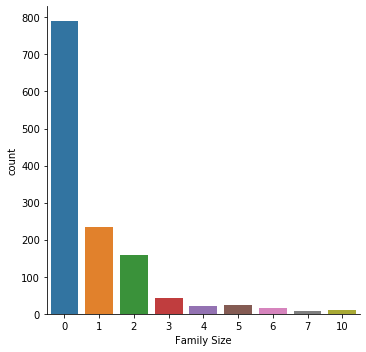

In [19]:
sns.factorplot("Family Size", data = dataset, kind = "count")

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

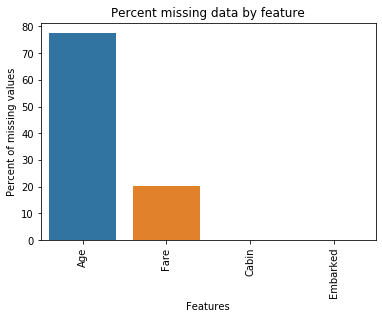

In [20]:
columns = [col for col in dataset.columns if dataset[col].isnull().sum()>0]
values = []

for col in columns:
    values.append(dataset[col].isnull().sum() / len(dataset[col]) *100)

values.sort(reverse = True)

sns.barplot(x = columns, y = values)
plt.title("Percent missing data by feature")
plt.xlabel("Features")
plt.ylabel("Percent of missing values")
plt.xticks(rotation = '90')

In [21]:
import string

def substrings_in_string(big_string, title_list):
    for title in title_list:
        if big_string.find(title)!=-1:
            return title
    print(big_string)
    return np.nan
    

In [22]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

In [23]:
dataset['Title']=dataset['Name'].map(lambda x: substrings_in_string(x, title_list))

In [24]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [25]:
dataset['Title']=dataset.apply(replace_titles, axis=1)

In [26]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [27]:
def cabin_transformer(ds):
    ds["Cabin"] = ds["Cabin"].isnull()
    array = []
    for cabin in ds["Cabin"]:
        if cabin == True:
            array.append(0)
        else:
            array.append(1)
            
    return array

In [28]:
pn = cabin_transformer(dataset)

In [29]:
dataset["Cabin"] = pn

In [30]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,Mr


In [31]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())

In [32]:
dataset["Age * Pclass"] = dataset["Age"] * dataset["Pclass"]

In [33]:
dataset["Family Size"].idxmax()

159

In [34]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Title,Age * Pclass
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1,Mr,66.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,1,Mrs,38.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,Miss,78.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,1,Mrs,35.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,Mr,105.0


In [35]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].sort_values(ascending = False).median())

In [36]:
dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])

In [37]:
dataset.drop(["Name", "Ticket"], axis = 1, inplace  = True)

In [38]:
dataset.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family Size,Title,Age * Pclass
0,1,3,male,22.0,1,0,7.2500,0,S,1,Mr,66.0
1,2,1,female,38.0,1,0,71.2833,1,C,1,Mrs,38.0
2,3,3,female,26.0,0,0,7.9250,0,S,0,Miss,78.0
3,4,1,female,35.0,1,0,53.1000,1,S,1,Mrs,35.0
4,5,3,male,35.0,0,0,8.0500,0,S,0,Mr,105.0


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId     1309 non-null int64
Pclass          1309 non-null int64
Sex             1309 non-null object
Age             1309 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Fare            1309 non-null float64
Cabin           1309 non-null int64
Embarked        1309 non-null object
Family Size     1309 non-null int64
Title           1309 non-null object
Age * Pclass    1309 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 172.9+ KB


## Perform One Hot Encoding Vector

In [40]:
columns = dataset.select_dtypes(include = ["object"]).columns

In [41]:
from sklearn.preprocessing import OneHotEncoder

for col in columns:
    encoded = pd.get_dummies(dataset[col])
    dataset.drop([col], axis = 1, inplace = True)
    dataset = pd.concat([dataset, encoded], axis = 1)

In [42]:
dataset.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Family Size,Age * Pclass,female,male,C,Q,S,Master,Miss,Mr,Mrs
0,1,3,22.0,1,0,7.2500,0,1,66.0,0,1,0,0,1,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,1,38.0,1,0,1,0,0,0,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,78.0,1,0,0,0,1,0,1,0,0
3,4,1,35.0,1,0,53.1000,1,1,35.0,1,0,0,0,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,105.0,0,1,0,0,1,0,0,1,0


## Train a model

In [43]:
dataset.shape
dataset.drop(["PassengerId"], axis = 1, inplace = True)

In [44]:
X_train = dataset[:len(train)]
y_train = y
X_test = dataset[len(train):]


In [45]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 5, tol = None)
sgd_clf.fit(X_train, y_train)
Y_pred = sgd_clf.predict(X_test)

acc_sgd = round(sgd_clf.score(X_train, y_train)*100, 2)

In [46]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

c:\users\ajdin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)

In [49]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100, 2)

In [65]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter = 50)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100, 2)

In [70]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)

acc_svc = round(linear_svc.score(X_train, y_train)*100, 2)

c:\users\ajdin\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [71]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.65,KNN
98.65,Random Forest
98.65,Decision Tree
83.05,Logistic Regression
81.71,Naive Bayes
77.67,Support Vector Machines
72.95,Stochastic Gradient Decent
72.39,Perceptron


## Model Selction

In [54]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = 100)
score = cross_val_score(rf, X_train, y_train, cv = 10, scoring = 'accuracy')

print("Score: ", score)
print("Mean: ", score.mean())
print("Standard deviation: ", score.std())

Score:  [0.75555556 0.81111111 0.71910112 0.85393258 0.83146067 0.84269663
 0.78651685 0.7752809  0.84269663 0.875     ]
Mean:  0.8093352059925094
Standard deviation:  0.04662002152663599


In [72]:
KNN = KNeighborsClassifier(n_neighbors = 5)
score = cross_val_score(KNN, X_train, y_train, cv = 10, scoring = 'accuracy')

print("Score: ", score)
print("Mean: ", score.mean())
print("Standard deviation: ", score.std())

Score:  [0.62222222 0.64444444 0.71910112 0.69662921 0.73033708 0.70786517
 0.76404494 0.78651685 0.69662921 0.80681818]
Mean:  0.7174608443990466
Standard deviation:  0.05518497345427861


In [55]:
importances = pd.DataFrame({
    'feature':X_train.columns,
    'importance': np.round(random_forest.feature_importances_, 3)
})

importances.sort_values(by = "importance", ascending = False).set_index("feature")

,importance
feature,
Fare,0.187
Age * Pclass,0.149
Age,0.121
Mr,0.120
male,0.088
female,0.063
Pclass,0.056
Family Size,0.048
SibSp,0.035


In [56]:
X_train.drop(["Master", "S", "C", "Q", "Parch"], axis = 1, inplace = True)
X_test.drop(["Master", "S", "C", "Q", "Parch"], axis = 1, inplace = True)

c:\users\ajdin\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
X_train.head()

,Pclass,Age,SibSp,Fare,Cabin,Family Size,Age * Pclass,female,male,Miss,Mr,Mrs
0,3,22.0,1,7.2500,0,1,66.0,0,1,0,1,0
1,1,38.0,1,71.2833,1,1,38.0,1,0,0,0,1
2,3,26.0,0,7.9250,0,0,78.0,1,0,1,0,0
3,1,35.0,1,53.1000,1,1,35.0,1,0,0,0,1
4,3,35.0,0,8.0500,0,0,105.0,0,1,0,1,0


In [73]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.bestparams

c:\users\ajdin\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AttributeError: 'GridSearchCV' object has no attribute 'bestparams'

In [60]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
len(y_pred)

418

In [61]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("data/gender_submission.csv")
ds = pd.concat([sub_df["PassengerId"].astype(int), pd.Series(y_pred)], axis = 1)

In [62]:
ds.columns = ["PassengerId", "Survived"]
ds.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [63]:
ds.to_csv("ludjii.csv", index = False)